<h1> <center>Machine Learning Project</h1><center>  - Zoo Animal Classification
  

<h3>About Dataset:

This dataset consists of 101 animals from a zoo.<br>
There are 16 variables with various traits to describe the animals.<br>
The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate

<h3>Importing Libraries:

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

<h3> Loading the data:

In [5]:
class1 = pd.read_csv("class.csv")
class1.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [6]:
df = pd.read_csv("zoo.csv")
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


<h3> Preprocessing and Exploratory Data Analysis:

In [7]:
df.shape

(101, 18)

In [92]:
df.info

<bound method DataFrame.info of      hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
96      1         0     0     1         0        0         0        1   
97      1         0     1     0         1        0         0        0   
98      1         0     0     1         0        0         1        1   
99      0         0     1     0         0        0         0        0   
100     0         1     1     0         1        0         0        0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0           1    

In [12]:
df["class_type"].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [9]:
class1["Class_Type"].unique()

array(['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug',
       'Invertebrate'], dtype=object)

Hence we can see that there are 7 different categories that an animal could belong to: Mammal, Bird, Reptile, Fish, Amphibians, Bug and Intvertebrate.

In [13]:
df.drop("animal_name", axis=1, inplace=True)
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [14]:
df.isna().sum()

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

Hence there are no null values present in the dataset.

In [15]:
df.dtypes

hair          int64
feathers      int64
eggs          int64
milk          int64
airborne      int64
aquatic       int64
predator      int64
toothed       int64
backbone      int64
breathes      int64
venomous      int64
fins          int64
legs          int64
tail          int64
domestic      int64
catsize       int64
class_type    int64
dtype: object

<AxesSubplot:title={'center':'Correlation Matrix:'}>

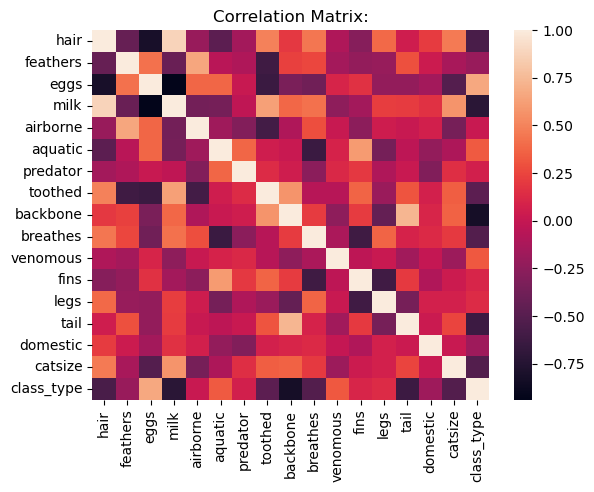

In [50]:
plt.title("Correlation Matrix:")
sns.heatmap(df.corr())

Here we can observe that:<br> 
There is a positive correlation between 'aquatic' and 'fins'<br>
There is a negative correlation between 'fins' and 'legs'<br>
There is zero correlation between 'hair' and 'eggs'

In [51]:
#x = df['class_type'].value_counts().index.tolist()
x=["Mammal", "Bird","Fish", "Invertebrate", "Bug", "Reptile","Amphibian" ]
y = df['class_type'].value_counts().tolist()

In [52]:
x

['Mammal', 'Bird', 'Fish', 'Invertebrate', 'Bug', 'Reptile', 'Amphibian']

In [53]:
y

[41, 20, 13, 10, 8, 5, 4]

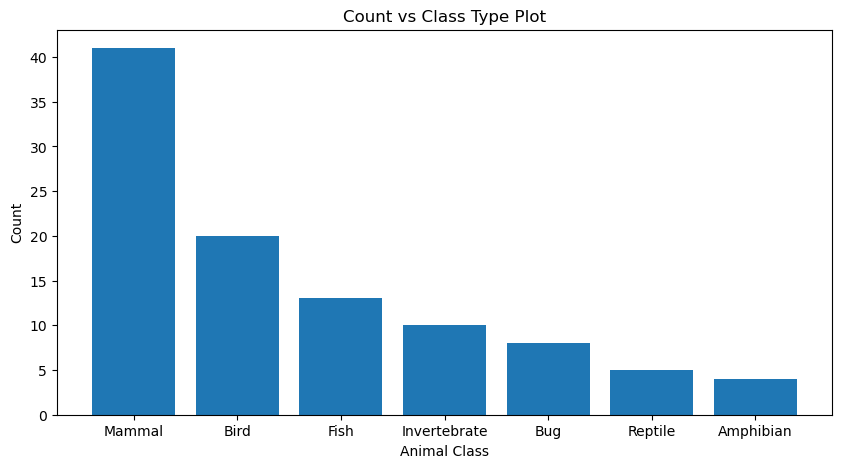

In [66]:
fig = plt.figure(figsize = (10, 5))
plt.bar(x, y)
plt.xlabel("Animal Class")
plt.ylabel("Count")
plt.title("Count vs Class Type Plot")
plt.show()

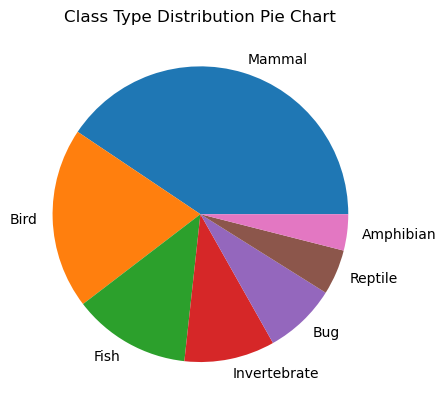

In [70]:
plt.title("Class Type Distribution Pie Chart")
plt.pie(y, labels = x)
plt.show()

<AxesSubplot:xlabel='legs', ylabel='count'>

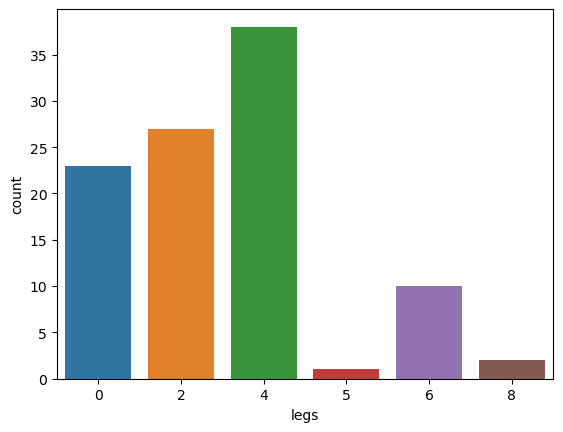

In [56]:
sns.countplot(x = df["legs"])

Hence most of the animals have 4 legs and very few have 5 legs.

<AxesSubplot:xlabel='venomous', ylabel='count'>

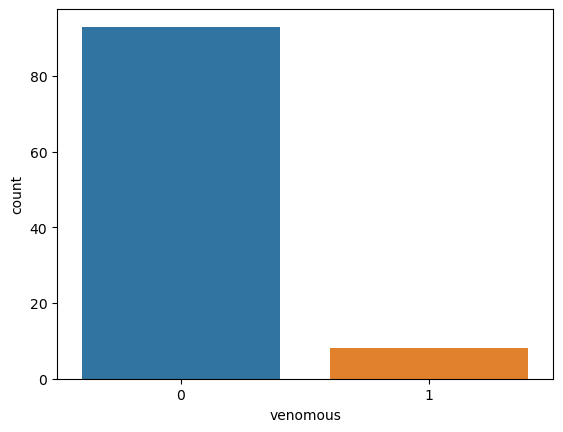

In [72]:
sns.countplot(x = df["venomous"])

Hence there are few very animals that are venomous.

<h1> Splitting the data into training and test data:

In [73]:
X = df.drop("class_type", axis=1)
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [74]:
y = df["class_type"]
y.head()

0    1
1    1
2    4
3    1
4    1
Name: class_type, dtype: int64

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [105]:
len(X_train), len(X_test)

(70, 31)

<h1> Linear Regression

In [106]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [107]:
LinearRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Linear Regression model:",LinearRegressionScore*100)

Accuracy obtained by Linear Regression model: 98.53793164340632


<h1> Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(X_train, y_train)

LogisticRegression()

In [109]:
log_acc = log_model.score(X_test, y_test)
print("Accuracy obtained:", log_acc*100)

Accuracy obtained: 100.0


<h1> Naive Bayes

In [110]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [111]:
naive_acc = classifier.score(X_test, y_test)

In [112]:
print("Accuracy obtained:", naive_acc*100)

Accuracy obtained: 96.7741935483871


<h1> Decision Tree

In [113]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [114]:
dt_acc = classifier.score(X_test, y_test)

In [115]:
print("Accuracy obtained:", dt_acc*100)

Accuracy obtained: 93.54838709677419


<h1> Conclusion

Hence Logistic Regression Algorithm gives the best accuracy(100%) and Linear Regression comes in close second(98.5%).